In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_colwidth', None)  # or 199

df_facts = pd.read_csv("outputs/acs/all_facts.csv").dropna()
df_data = pd.read_csv("data/acs/acstest.csv")
df_data['log_income'] = np.log(df_data["Total person's income"])
colors = ['b','g']

c:\users\talbl\ideaprojects\ex3\venv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\talbl\ideaprojects\ex3\venv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Introduction
Our current problem is the current algorithm is *very* slow even where the subpopulations are in size=1. Becuase we look for over each possible combination of (subpopulation, treatment).

In our last meeting we disscussed about finding the sub-populations with the biggest difference between the subpopulation's outcome to the protected subpopulation's income. With that hopefully we get good results in better runtime.

We decided on 2 approaches:
1. With different metrics (preferbly does not depend on treatment) find with the extremes values whose hopefully will point on the intresting subpopulations. For distributions comparison I used: KL, EMD and difference in income means

2. with divexplorer: they used apriori algorithm and find the frequent itemsets that have the highest f. In the original way f=f(I)-f(D). where I is specific itemset and D is the score over all the dataset. I changed 2 things in the original implemantion: I used the f=average of income + I changed the comparison instead of looking all the dataset, I defined to compare between itemset's income to protected itemset's income => f = f(I) - f(Protected x I)

# by ni_score

In [35]:
df_facts.query('ni_score == ni_score.max()')

,subpopulation,value_population,treatment,value,outcome,ate,ate_p,iscore,size,size_protected,size_treated,support,ni_score,p_v1,p_v2,utility,std,kl,emd,diff_means
915,Race/Ethnicity,American Indian or Alaska Native,Educational attainment,Professional Degree,Total person's income,119000.5943,60340.5303,58660.06404,3404,1720,12,0.009026,0.994905,[3.74585936e-28],[7.12602833e-05],0.00898,37722.61761,53797156.49,5131.240698,4750.868605


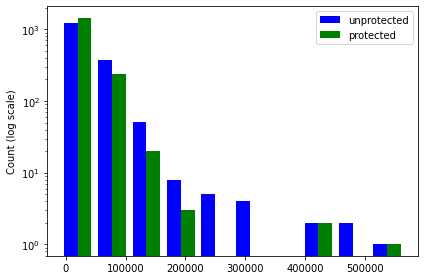

In [36]:
fig, ax1 = plt.subplots()
df_filtered = df_data.loc[df_data["Race/Ethnicity"]=="American Indian or Alaska Native"]
df_protected = df_filtered.loc[df_filtered["Sex"]=="Woman"]
df_unprotected = df_filtered.loc[df_filtered["Sex"]=="Man"]

ax1.hist([df_unprotected["Total person's income"],df_protected["Total person's income"]],color=colors, label=['unprotected', 'protected'], log=True)
ax1.set_ylabel("Count (log scale)")
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

Here I got the subpopulation with the maximum ni_score value is: Race=American Indian or Alaska Native. I separate between the protected and unprotected groups in that subpopulation and calced the histogram of those 2 sets' income.

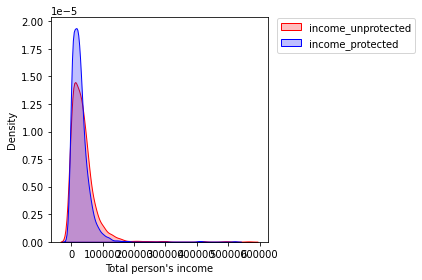

In [37]:
# import matplotlib.pyplot as plt


# # Filter the datahttp://localhost:8888/notebooks/09-07.ipynb#
df_filtered = df_data.loc[df_data["Race/Ethnicity"] == "American Indian or Alaska Native"]
df_protected = df_filtered.loc[df_filtered["Sex"] == "Woman"]
df_unprotected = df_filtered.loc[df_filtered["Sex"] == "Man"]

# # Convert to numpy arrays
income_unprotected = df_unprotected["Total person's income"]
income_protected = df_protected["Total person's income"]

fig, ax = plt.subplots()
sns.kdeplot(data=income_unprotected.squeeze(), ax=ax, color='red', fill=True, label='income_unprotected')
sns.kdeplot(data=income_protected.squeeze(), ax=ax, color='blue', fill=True, label='income_protected')
ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')
plt.tight_layout()
plt.show()


Here is the same calced with subpopulation with minimum ni_score

In [38]:
df_facts.query('ni_score == ni_score.min()')

,subpopulation,value_population,treatment,value,outcome,ate,ate_p,iscore,size,size_protected,size_treated,support,ni_score,p_v1,p_v2,utility,std,kl,emd,diff_means
127,Age,17-24,Educational attainment,Master's degree,Total person's income,16142.13608,16132.32186,9.814223,48066,23683,385,0.127445,0.000883,[1.44808343e-64],[3.67342386e-51],0.000113,18620.26888,393058723.2,1606.166913,1556.475067


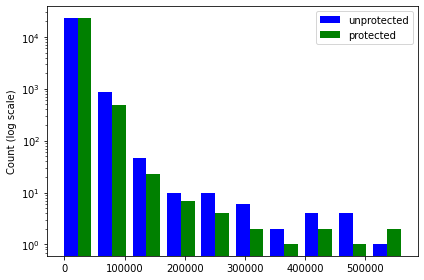

In [39]:
fig, ax1 = plt.subplots()
df_filtered = df_data.loc[df_data["Age"]=="17-24"]
df_protected = df_filtered.loc[df_filtered["Sex"]=="Woman"]
df_unprotected = df_filtered.loc[df_filtered["Sex"]=="Man"]

ax1.hist([df_unprotected["Total person's income"],df_protected["Total person's income"]],color=colors, label=['unprotected', 'protected'], log=True)
ax1.set_ylabel("Count (log scale)")
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

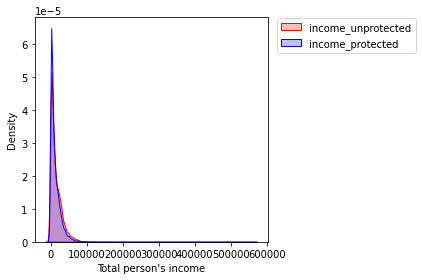

In [40]:
df_protected = df_filtered.loc[df_filtered["Sex"] == "Woman"]
df_unprotected = df_filtered.loc[df_filtered["Sex"] == "Man"]

# # Convert to numpy arrays
income_unprotected = df_unprotected["Total person's income"]
income_protected = df_protected["Total person's income"]

fig, ax = plt.subplots()
sns.kdeplot(data=income_unprotected.squeeze(), ax=ax, color='red', fill=True, label='income_unprotected')
sns.kdeplot(data=income_protected.squeeze(), ax=ax, color='blue', fill=True, label='income_protected')
ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')
plt.tight_layout()
plt.show()

# by utility

In [9]:
df_facts.query('utility == utility.max()')

,subpopulation,value_population,treatment,value,outcome,ate,ate_p,iscore,size,size_protected,size_treated,support,ni_score,p_v1,p_v2,utility,std,kl,emd,diff_means
769,With a disability,no,Educational attainment,Professional Degree,Total person's income,95552.95982,71307.57713,24245.38269,343672,168791,8428,0.911234,0.887194,[0.],[0.],0.808441,64536.09246,1.045705e+10,11127.96578,11126.39916


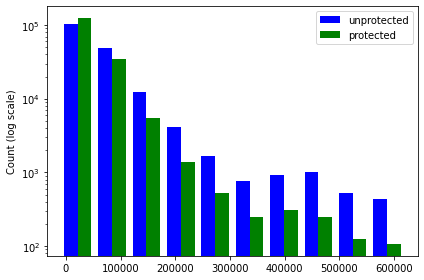

In [10]:
fig, ax1 = plt.subplots()
df_filtered = df_data.loc[df_data["With a disability"]=="no"]
df_protected = df_filtered.loc[df_filtered["Sex"]=="Woman"]
df_unprotected = df_filtered.loc[df_filtered["Sex"]=="Man"]

ax1.hist([df_unprotected["Total person's income"],df_protected["Total person's income"]],color=colors, label=['unprotected', 'protected'], log=True)
ax1.set_ylabel("Count (log scale)")
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

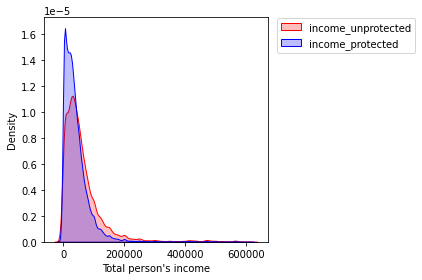

In [11]:
df_protected = df_filtered.loc[df_filtered["Sex"] == "Woman"]
df_unprotected = df_filtered.loc[df_filtered["Sex"] == "Man"]

# # Convert to numpy arrays
income_unprotected = df_unprotected["Total person's income"]
income_protected = df_protected["Total person's income"]

fig, ax = plt.subplots()
sns.kdeplot(data=income_unprotected.squeeze(), ax=ax, color='red', fill=True, label='income_unprotected')
sns.kdeplot(data=income_protected.squeeze(), ax=ax, color='blue', fill=True, label='income_protected')
ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')
plt.tight_layout()
plt.show()

In [10]:
df_facts.query('utility == utility.min()')

,subpopulation,value_population,treatment,value,outcome,ate,ate_p,iscore,size,size_protected,size_treated,support,ni_score,p_v1,p_v2,utility,std,kl,emd,diff_means
232,Age,0-16,When last worked,Within past year,Total person's income,1926.8311,2061.743017,134.911916,2253,1134,2130,0.005974,0.012069,[0.00036334],[0.00807071],0.000072,5832.732661,4212617.557,211.763668,195.925926
233,Age,0-16,When last worked,1-5 yrs ago,Total person's income,-1926.8311,-2061.743017,134.911916,2253,1134,123,0.005974,0.012069,[0.00036334],[0.00807071],0.000072,5832.732661,4212617.557,211.763668,195.925926


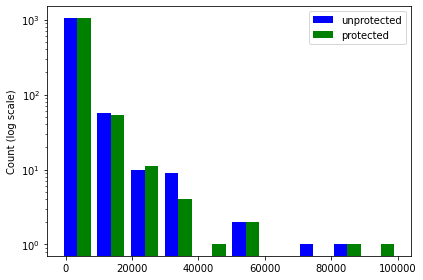

In [12]:
fig, ax1 = plt.subplots()
df_filtered = df_data.loc[df_data["Age"]=="0-16"]
df_protected = df_filtered.loc[df_filtered["Sex"]=="Woman"]
df_unprotected = df_filtered.loc[df_filtered["Sex"]=="Man"]
ax1.hist([df_unprotected["Total person's income"],df_protected["Total person's income"]],color=colors, label=['unprotected', 'protected'], log=True)
ax1.set_ylabel("Count (log scale)")
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

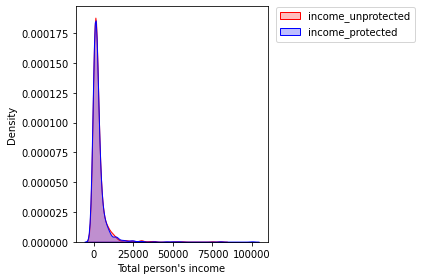

In [13]:
df_protected = df_filtered.loc[df_filtered["Sex"] == "Woman"]
df_unprotected = df_filtered.loc[df_filtered["Sex"] == "Man"]

# # Convert to numpy arrays
income_unprotected = df_unprotected["Total person's income"]
income_protected = df_protected["Total person's income"]

fig, ax = plt.subplots()
sns.kdeplot(data=income_unprotected.squeeze(), ax=ax, color='red', fill=True, label='income_unprotected')
sns.kdeplot(data=income_protected.squeeze(), ax=ax, color='blue', fill=True, label='income_protected')
ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')
plt.tight_layout()
plt.show()

# by kl

In [14]:
df_facts.query('kl == kl.max()')

,subpopulation,value_population,treatment,value,outcome,ate,ate_p,iscore,size,size_protected,size_treated,support,ni_score,p_v1,p_v2,utility,std,kl,emd,diff_means
982,When last worked,Within past year,Educational attainment,Bachelor's degree,Total person's income,22775.658630,15979.790370,6795.868253,333115,159970,73198,0.883243,0.457533,[0.],[0.],0.404113,65049.78278,1.079608e+10,11295.13378,11292.69194
983,When last worked,Within past year,Educational attainment,Master's degree,Total person's income,38836.546700,30786.465490,8050.081213,333115,159970,31561,0.883243,0.515437,[0.],[0.],0.455256,65049.78278,1.079608e+10,11295.13378,11292.69194
984,When last worked,Within past year,Educational attainment,No Degree,Total person's income,-40779.074810,-31624.812410,9154.262400,333115,159970,184551,0.883243,0.561275,[0.],[0.],0.495743,65049.78278,1.079608e+10,11295.13378,11292.69194
985,When last worked,Within past year,Educational attainment,Associate's degree,Total person's income,-6798.782893,-3835.429752,2963.353142,333115,159970,30294,0.883243,0.234099,[2.03299939e-67],[2.66943107e-21],0.206766,65049.78278,1.079608e+10,11295.13378,11292.69194
986,When last worked,Within past year,Educational attainment,Doctorate degree,Total person's income,64946.352690,53097.407820,11848.944880,333115,159970,5428,0.883243,0.655756,[0.],[0.],0.579192,65049.78278,1.079608e+10,11295.13378,11292.69194
987,When last worked,Within past year,Educational attainment,Professional Degree,Total person's income,99716.836130,74961.319730,24755.516410,333115,159970,8083,0.883243,0.892256,[0.],[0.],0.788079,65049.78278,1.079608e+10,11295.13378,11292.69194


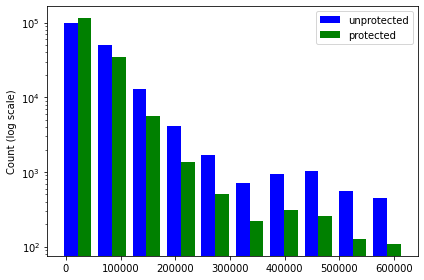

In [15]:
fig, ax1 = plt.subplots()
df_filtered = df_data.loc[df_data["When last worked"]=="Within past year"]
df_protected = df_filtered.loc[df_filtered["Sex"]=="Woman"]
df_unprotected = df_filtered.loc[df_filtered["Sex"]=="Man"]

ax1.hist([df_unprotected["Total person's income"],df_protected["Total person's income"]],color=colors, label=['unprotected', 'protected'], log=True)
ax1.set_ylabel("Count (log scale)")
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

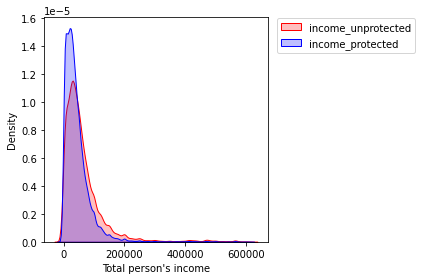

In [16]:
df_protected = df_filtered.loc[df_filtered["Sex"] == "Woman"]
df_unprotected = df_filtered.loc[df_filtered["Sex"] == "Man"]

# # Convert to numpy arrays
income_unprotected = df_unprotected["Total person's income"]
income_protected = df_protected["Total person's income"]

fig, ax = plt.subplots()
sns.kdeplot(data=income_unprotected.squeeze(), ax=ax, color='red', fill=True, label='income_unprotected')
sns.kdeplot(data=income_protected.squeeze(), ax=ax, color='blue', fill=True, label='income_protected')
ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
df_facts.query('kl == kl.min()')

,subpopulation,value_population,treatment,value,outcome,ate,ate_p,iscore,size,size_protected,size_treated,support,ni_score,p_v1,p_v2,utility,std,kl,emd,diff_means
232,Age,0-16,When last worked,Within past year,Total person's income,1926.8311,2061.743017,134.911916,2253,1134,2130,0.005974,0.012069,[0.00036334],[0.00807071],0.000072,5832.732661,4212617.557,211.763668,195.925926
233,Age,0-16,When last worked,1-5 yrs ago,Total person's income,-1926.8311,-2061.743017,134.911916,2253,1134,123,0.005974,0.012069,[0.00036334],[0.00807071],0.000072,5832.732661,4212617.557,211.763668,195.925926


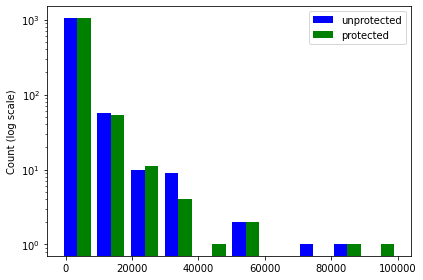

In [17]:
fig, ax1 = plt.subplots()
df_filtered = df_data.loc[df_data["Age"]=="0-16"]
df_protected = df_filtered.loc[df_filtered["Sex"]=="Woman"]
df_unprotected = df_filtered.loc[df_filtered["Sex"]=="Man"]

ax1.hist([df_unprotected["Total person's income"],df_protected["Total person's income"]],color=colors, label=['unprotected', 'protected'], log=True)
ax1.set_ylabel("Count (log scale)")
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

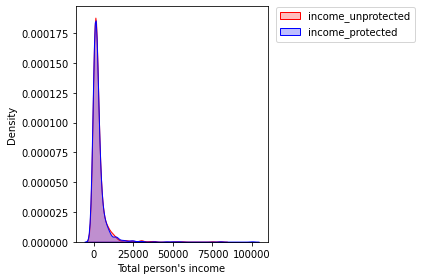

In [18]:
df_protected = df_filtered.loc[df_filtered["Sex"] == "Woman"]
df_unprotected = df_filtered.loc[df_filtered["Sex"] == "Man"]

# # Convert to numpy arrays
income_unprotected = df_unprotected["Total person's income"]
income_protected = df_protected["Total person's income"]

fig, ax = plt.subplots()
sns.kdeplot(data=income_unprotected.squeeze(), ax=ax, color='red', fill=True, label='income_unprotected')
sns.kdeplot(data=income_protected.squeeze(), ax=ax, color='blue', fill=True, label='income_protected')
ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')
plt.tight_layout()
plt.show()

# by emd

In [18]:
df_facts.query('emd == emd.max()')

,subpopulation,value_population,treatment,value,outcome,ate,ate_p,iscore,size,size_protected,size_treated,support,ni_score,p_v1,p_v2,utility,std,kl,emd,diff_means
596,Educational attainment,Professional Degree,Age,25-34,Total person's income,-72727.200460,-44758.58781,27968.612650,8925,3920,1430,0.023664,0.919313,[1.20383575e-77],[2.65514463e-24],0.021755,136416.6407,624333495.0,36471.29439,36471.29439
597,Educational attainment,Professional Degree,Age,45-54,Total person's income,33360.121850,27514.33445,5845.787396,8925,3920,1846,0.023664,0.409107,[6.64624943e-21],[5.96285656e-11],0.009681,136416.6407,624333495.0,36471.29439,36471.29439
600,Educational attainment,Professional Degree,Age,35-44,Total person's income,7318.345575,20283.83720,12965.491630,8925,3920,1850,0.023664,0.688668,[0.0399388],[6.27632387e-07],0.016297,136416.6407,624333495.0,36471.29439,36471.29439
601,Educational attainment,Professional Degree,Age,17-24,Total person's income,-130792.807700,-95435.61753,35357.190200,8925,3920,53,0.023664,0.958504,[3.22115336e-12],[4.67619843e-08],0.022682,136416.6407,624333495.0,36471.29439,36471.29439


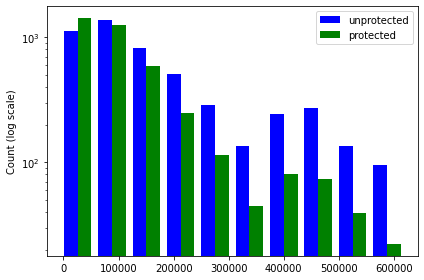

In [19]:
fig, ax1 = plt.subplots()
df_filtered = df_data.loc[df_data["Educational attainment"]=="Professional Degree"]
df_protected = df_filtered.loc[df_filtered["Sex"]=="Woman"]
df_unprotected = df_filtered.loc[df_filtered["Sex"]=="Man"]

ax1.hist([df_unprotected["Total person's income"],df_protected["Total person's income"]],color=colors, label=['unprotected', 'protected'], log=True)
ax1.set_ylabel("Count (log scale)")
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

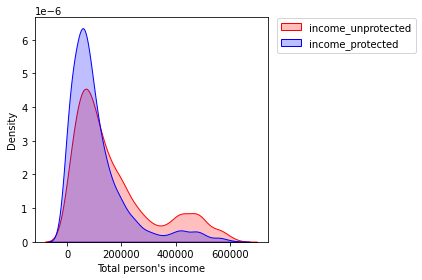

In [20]:
df_protected = df_filtered.loc[df_filtered["Sex"] == "Woman"]
df_unprotected = df_filtered.loc[df_filtered["Sex"] == "Man"]

# # Convert to numpy arrays
income_unprotected = df_unprotected["Total person's income"]
income_protected = df_protected["Total person's income"]

fig, ax = plt.subplots()
sns.kdeplot(data=income_unprotected.squeeze(), ax=ax, color='red', fill=True, label='income_unprotected')
sns.kdeplot(data=income_protected.squeeze(), ax=ax, color='blue', fill=True, label='income_protected')
ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')
plt.tight_layout()
plt.show()

In [20]:
df_facts.query('emd == emd.min()')

,subpopulation,value_population,treatment,value,outcome,ate,ate_p,iscore,size,size_protected,size_treated,support,ni_score,p_v1,p_v2,utility,std,kl,emd,diff_means
140,Age,0-16,Educational attainment,No Degree,Total person's income,-18701.41014,-27099.80565,8398.395511,2253,1134,2248,0.005974,0.530391,[6.07515391e-13],[4.73752029e-11],0.003168,5832.732661,4857257.605,196.261023,120.42328
141,Age,0-16,Educational attainment,Associate's degree,Total person's income,18701.41014,27099.80565,8398.395511,2253,1134,5,0.005974,0.530391,[6.07515391e-13],[4.73752029e-11],0.003168,5832.732661,4857257.605,196.261023,120.42328


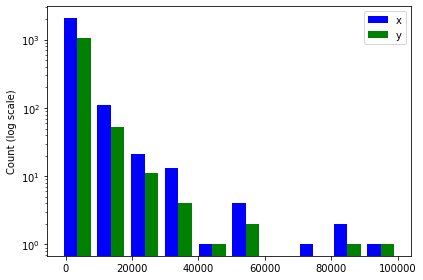

In [21]:
fig, ax1 = plt.subplots()
df_filtered = df_data.loc[df_data["Age"]=="0-16"]
df_protected = df_filtered.loc[df_filtered["Sex"]=="Woman"]
ax1.hist([df_filtered["Total person's income"],df_protected["Total person's income"]],color=colors, label=['x', 'y'], log=True)
ax1.set_ylabel("Count (log scale)")
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

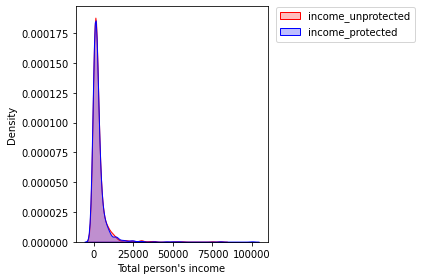

In [22]:
df_protected = df_filtered.loc[df_filtered["Sex"] == "Woman"]
df_unprotected = df_filtered.loc[df_filtered["Sex"] == "Man"]

# # Convert to numpy arrays
income_unprotected = df_unprotected["Total person's income"]
income_protected = df_protected["Total person's income"]

fig, ax = plt.subplots()
sns.kdeplot(data=income_unprotected.squeeze(), ax=ax, color='red', fill=True, label='income_unprotected')
sns.kdeplot(data=income_protected.squeeze(), ax=ax, color='blue', fill=True, label='income_protected')
ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')
plt.tight_layout()
plt.show()

# by diff_means

In [23]:
df_facts.query('diff_means == diff_means.max()')

,subpopulation,value_population,treatment,value,outcome,ate,ate_p,iscore,size,size_protected,size_treated,support,ni_score,p_v1,p_v2,utility,std,kl,emd,diff_means
596,Educational attainment,Professional Degree,Age,25-34,Total person's income,-72727.200460,-44758.58781,27968.612650,8925,3920,1430,0.023664,0.919313,[1.20383575e-77],[2.65514463e-24],0.021755,136416.6407,624333495.0,36471.29439,36471.29439
597,Educational attainment,Professional Degree,Age,45-54,Total person's income,33360.121850,27514.33445,5845.787396,8925,3920,1846,0.023664,0.409107,[6.64624943e-21],[5.96285656e-11],0.009681,136416.6407,624333495.0,36471.29439,36471.29439
600,Educational attainment,Professional Degree,Age,35-44,Total person's income,7318.345575,20283.83720,12965.491630,8925,3920,1850,0.023664,0.688668,[0.0399388],[6.27632387e-07],0.016297,136416.6407,624333495.0,36471.29439,36471.29439
601,Educational attainment,Professional Degree,Age,17-24,Total person's income,-130792.807700,-95435.61753,35357.190200,8925,3920,53,0.023664,0.958504,[3.22115336e-12],[4.67619843e-08],0.022682,136416.6407,624333495.0,36471.29439,36471.29439


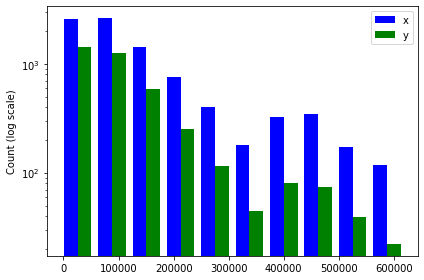

In [23]:
fig, ax1 = plt.subplots()
df_filtered = df_data.loc[df_data["Educational attainment"]=="Professional Degree"]
df_protected = df_filtered.loc[df_filtered["Sex"]=="Woman"]
ax1.hist([df_filtered["Total person's income"],df_protected["Total person's income"]],color=colors, label=['x', 'y'], log=True)
ax1.set_ylabel("Count (log scale)")
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

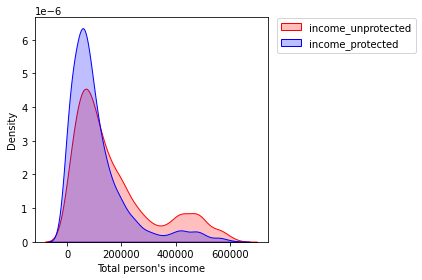

In [24]:
df_protected = df_filtered.loc[df_filtered["Sex"] == "Woman"]
df_unprotected = df_filtered.loc[df_filtered["Sex"] == "Man"]

# # Convert to numpy arrays
income_unprotected = df_unprotected["Total person's income"]
income_protected = df_protected["Total person's income"]

fig, ax = plt.subplots()
sns.kdeplot(data=income_unprotected.squeeze(), ax=ax, color='red', fill=True, label='income_unprotected')
sns.kdeplot(data=income_protected.squeeze(), ax=ax, color='blue', fill=True, label='income_protected')
ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')
plt.tight_layout()
plt.show()

In [25]:
df_facts.query('diff_means == diff_means.min()')

,subpopulation,value_population,treatment,value,outcome,ate,ate_p,iscore,size,size_protected,size_treated,support,ni_score,p_v1,p_v2,utility,std,kl,emd,diff_means
140,Age,0-16,Educational attainment,No Degree,Total person's income,-18701.41014,-27099.80565,8398.395511,2253,1134,2248,0.005974,0.530391,[6.07515391e-13],[4.73752029e-11],0.003168,5832.732661,4857257.605,196.261023,120.42328
141,Age,0-16,Educational attainment,Associate's degree,Total person's income,18701.41014,27099.80565,8398.395511,2253,1134,5,0.005974,0.530391,[6.07515391e-13],[4.73752029e-11],0.003168,5832.732661,4857257.605,196.261023,120.42328


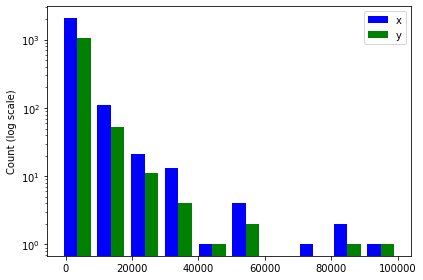

In [25]:
fig, ax1 = plt.subplots()
df_filtered = df_data.loc[df_data["Age"]=="0-16"]
df_protected = df_filtered.loc[df_filtered["Sex"]=="Woman"]
ax1.hist([df_filtered["Total person's income"],df_protected["Total person's income"]],color=colors, label=['x', 'y'], log=True)
ax1.set_ylabel("Count (log scale)")
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

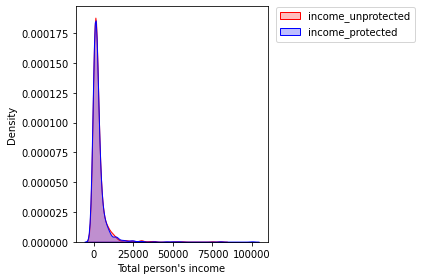

In [26]:
df_protected = df_filtered.loc[df_filtered["Sex"] == "Woman"]
df_unprotected = df_filtered.loc[df_filtered["Sex"] == "Man"]

# # Convert to numpy arrays
income_unprotected = df_unprotected["Total person's income"]
income_protected = df_protected["Total person's income"]

fig, ax = plt.subplots()
sns.kdeplot(data=income_unprotected.squeeze(), ax=ax, color='red', fill=True, label='income_unprotected')
sns.kdeplot(data=income_protected.squeeze(), ax=ax, color='blue', fill=True, label='income_protected')
ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')
plt.tight_layout()
plt.show()

# show divexplorer results

In [ ]:
fp_diver = DivergenceExplorer(df)
subgroups = fp_diver.get_pattern_divergence(min_support=0.4, quantitative_outcomes=["Total person's income"])
subgroups = subgroups.sort_values(by="Total person's income_div", ascending=False, ignore_index=True)
d = subgroups.head(10)

In [29]:
df_res = pd.read_csv("algorithms/divexplorer/divexplorer_res.csv")
df_res

,support,itemset,Total person's income,Total person's income_protected,Total person's income_div,Total person's income_t,length,support_count
0,0.411396,"frozenset({'With a disability=no', 'Marital status=Married', 'Race/Ethnicity=White'})",66372.008127,46556.340573,19815.667554,72.276997,3,155158.0
1,0.400552,"frozenset({'Citizenship status=Born in the U.S.', 'Marital status=Married', 'Race/Ethnicity=White'})",65742.617755,46170.562439,19572.055316,71.286962,3,151068.0
2,0.447331,"frozenset({'Marital status=Married', 'Race/Ethnicity=White'})",64936.699960,45568.526439,19368.173521,74.265483,2,168711.0
3,0.409349,"frozenset({'Citizenship status=Born in the U.S.', 'With a disability=no', 'Marital status=Married'})",66019.586044,47027.766558,18991.819486,70.255957,3,154386.0
4,0.447021,"frozenset({'Citizenship status=Born in the U.S.', 'Marital status=Married'})",64465.594440,45930.776237,18534.818203,72.349176,2,168594.0
5,0.503569,"frozenset({'With a disability=no', 'Marital status=Married'})",64766.663302,46445.512639,18321.150663,74.408043,2,189921.0
6,0.450680,"frozenset({'With a disability=no', 'When last worked=Within past year', 'Marital status=Married'})",69384.723234,51374.194761,18010.528473,67.386326,3,169974.0
7,0.546276,frozenset({'Marital status=Married'}),63361.433490,45441.723155,17919.710335,76.524644,1,206028.0
8,0.480233,"frozenset({'When last worked=Within past year', 'Marital status=Married'})",68560.288455,50747.686238,17812.602217,69.246983,2,181120.0
9,0.641387,"frozenset({'With a disability=no', 'When last worked=Within past year', 'Race/Ethnicity=White'})",58023.801355,45415.565473,12608.235882,61.980904,3,241899.0
